         Last_Name First_Name  Student_ID     Total  Quiz1  Quiz2  Quiz3  \
0            Brodt      Tayah   114085147  1,313.00    0.0    0.0    0.0   
1         Chaqueco     Vivian   114060022       435    0.0   40.0   30.0   
2      Christensen      Caleb   114082086       451    0.0    0.0    0.0   
3            Davis    Schylar   111669236  1,678.00   30.0   40.0   30.0   
4             Dina     Darius   114018958  1,215.00   30.0   50.0   20.0   
5            Dueno        Kim   114062901  1,349.00   30.0   50.0   30.0   
6           Elison    Candice   112026569  1,777.00   30.0   50.0   20.0   
7         Ferguson     Triton   113132972  1,341.00   30.0   50.0   30.0   
8            Fults     Mariah   113054505       548    0.0   40.0    0.0   
9       Grosswiler       Kate   112080032  1,672.00   30.0   50.0   30.0   
10          Hearst      Derek   114098781  1,197.00   30.0   40.0   30.0   
11           Kuehn        Jes   114118439  1,774.00   30.0   50.0   30.0   
12  Miller-C

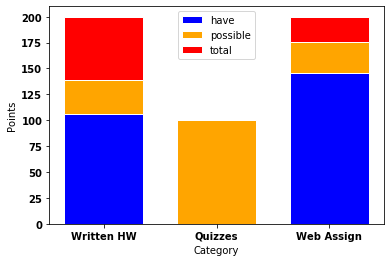

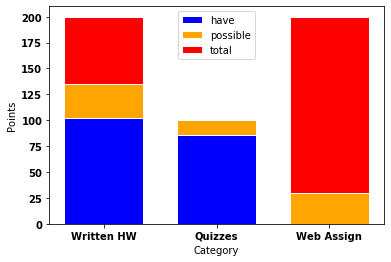

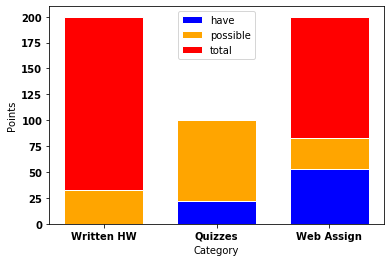

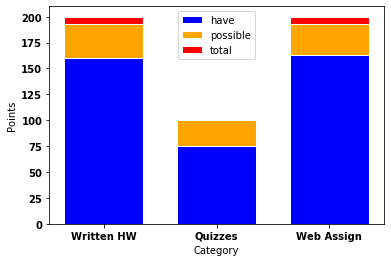

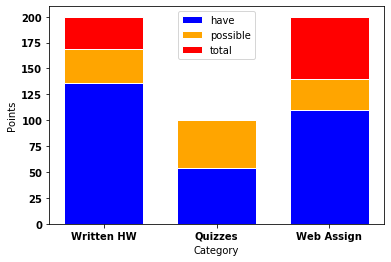

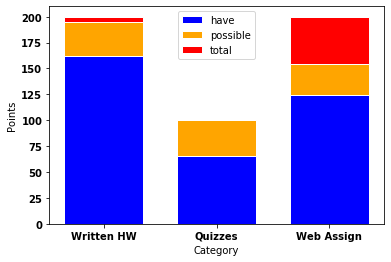

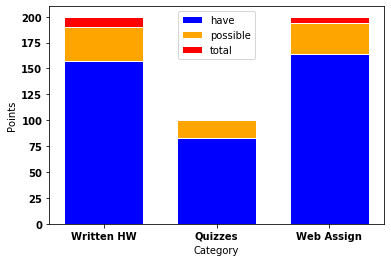

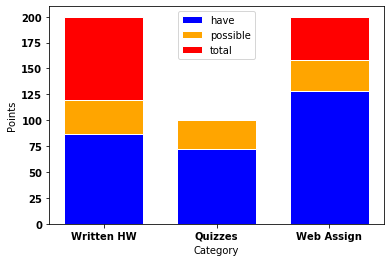

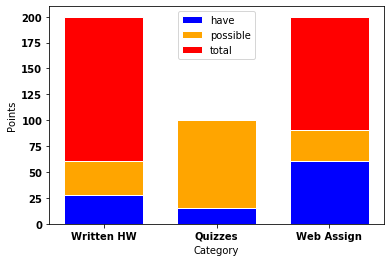

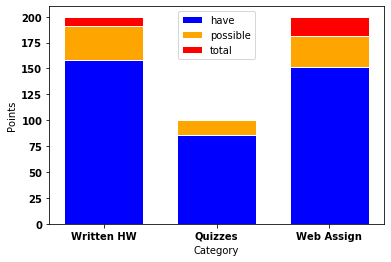

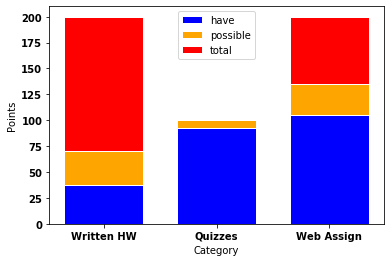

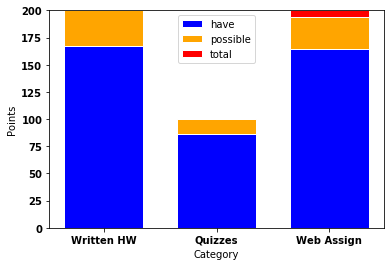

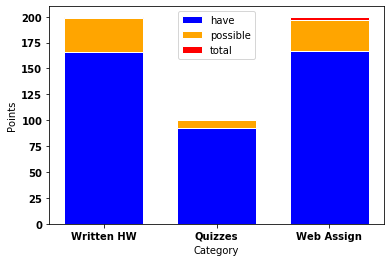

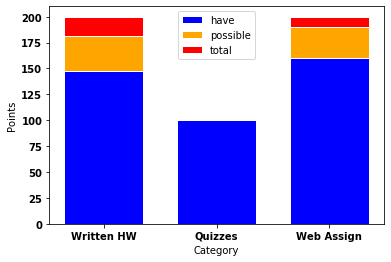

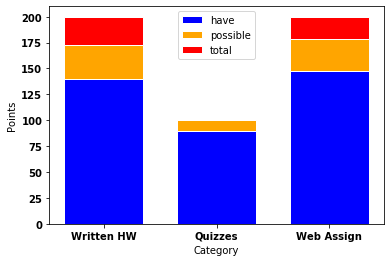

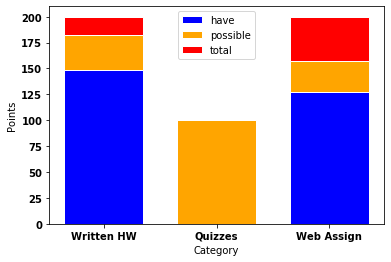

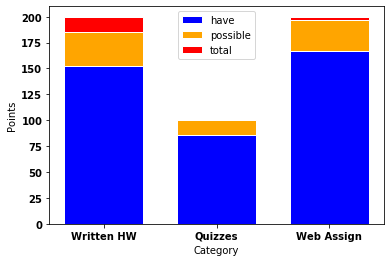

In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

sr = pd.read_csv("Student_Report.csv")
sr.drop(['Username', 'SG1', 'OC1', 'SG2', 'OC2', 'SG3', 'OC3'], axis=1, inplace=True)
sr = sr.fillna(0)

sr["WHW_Raw"]=sr.loc[:,'WHW1':'WHW20'].sum(axis=1)
sr["Quiz_Raw"]=sr.loc[:,'Quiz1':'Quiz12'].sum(axis=1)

sr["WHW_Points"]=np.ceil((sr.WHW_Raw/240)*200)
sr["Quiz_Points"]=np.ceil((sr.Quiz_Raw/280)*100)
sr["WARaw"]=sr.WARaw.apply(lambda x: str(x))

def to_float(string):
    if "," in string:
        return float(string.split(",")[0]+string.split(",")[1])
    else:
        return float(string)
        
sr["WARaw"]=sr.WARaw.apply(lambda x: to_float(x))

sr["WA_Points"]=np.ceil((sr.WARaw/1345)*200)
print(sr)

#print(sr["WHW_Points"][5])

#Bar Chart
for i in range(17):
    have=[sr["WHW_Points"][i], sr["Quiz_Points"][i], sr["WA_Points"][i]]
    poss=[33, (100-sr["Quiz_Points"][i]), 30]
    total=[(200-(have[0]+poss[0])) , 0 , (200-(have[2]+poss[2]))]

    #Create bottom of top bar
    bottom_total=np.add(have, poss).tolist()

    #Position of bars on x axis
    r=[0,1,2]

    barwidth=0.7

    names=['Written HW','Quizzes', 'Web Assign']

    plt.bar(r, have, color="blue", edgecolor="white", width=barwidth)
    plt.bar(r, poss, bottom=have, color="orange", edgecolor="white", width=barwidth)
    plt.bar(r, total, bottom=bottom_total, color="red", edgecolor="white", width=barwidth)

    plt.xticks(r, names, fontweight='bold')
    plt.xlabel('Category')
    plt.yticks(fontweight='bold')
    plt.ylabel('Points')
    plt.legend(['have','possible','total'])

    plt.show()